<center><h1>Pre procesamiento de Datos</h1></center>

In [18]:
#Importar la libreria para manipulación de datos
import pandas as pd
#Importar la libreria para realizar calculos avanzados
import numpy as np
#Importar la libreria para realizar graficos
import matplotlib.pyplot as plt 

In [35]:
# Obtener el DataSet e mostrar el contenido
df = pd.read_csv("data_act_01.csv",sep=";")
df.sample(5)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
6253,160942941,Dismember Body Part,2016-04-03T00:00:00,18:31,2016-04-03T18:31:00,UTL,Shotwell St/18th St,San Francisco,CA,1,NaN,Intersection
1462,160922580,Assault / Battery,2016-04-01T00:00:00,16:53,2016-04-01T16:53:00,Not recorded,18th St/mission St,San Francisco,CA,1,NaN,Intersection
6259,160942955,Veh Accident,2016-04-03T00:00:00,18:37,2016-04-03T18:37:00,REP,Hyde St/bay St,San Francisco,CA,1,NaN,Intersection
7989,160952222,22500f,2016-04-04T00:00:00,14:33,2016-04-04T14:33:00,GOA,3500 Block Of 21st St,San Francisco,CA,1,NaN,Premise Address
1846,160923256,Suspicious Vehicle,2016-04-01T00:00:00,19:44,2016-04-01T19:44:00,GOA,1400 Block Of Potrero Av,San Francisco,CA,1,NaN,Common Location


In [36]:
#Observar el tipo de variables que contiene el objeto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


# Detección de valores nulos o perdidos

In [37]:
df.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

# Eliminar el Rango considerando dispone datos nulos

In [38]:
df = df.drop(['Range'], axis=1)
df.sample(5)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
8080,160952388,Demo / Protest,2016-04-04T00:00:00,15:13,2016-04-04T15:13:00,ND,100 Block Of Drumm St,San Francisco,CA,1,Common Location
2067,160923686,Traffic Stop,2016-04-01T00:00:00,22:04,2016-04-01T22:04:00,ADM,Alemany/ellsworth,NaN,CA,1,Geo-Override
7891,160952038,Homeless Complaint,2016-04-04T00:00:00,13:49,2016-04-04T13:49:00,HAN,Mission St/9th St,San Francisco,CA,1,Intersection
2508,160930312,Audible Alarm,2016-04-02T00:00:00,2:09,2016-04-02T02:09:00,PAS,800 Block Of Golden Gate Av,San Francisco,CA,1,Premise Address
64,160913956,Traffic Stop,2016-03-31T00:00:00,23:39,2016-03-31T23:39:00,CIT,6th St/bryant St,San Francisco,CA,1,Intersection


# Corregir elementos de Descripción de la multa

In [49]:
df['OriginalCrimeTypeName'] = df['OriginalCrimeTypeName'].replace('Rep','Report')
df['OriginalCrimeTypeName'] = df['OriginalCrimeTypeName'].replace('Rept','Report')
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [50]:
df.to_csv("pruebaY.csv")

# Controlar la Disposition del CVS considerando el valor 22

In [41]:
mask = df['CrimeId'] == 160920691
column_name = 'Disposition'
df.loc[mask,column_name] = 'HAN'

In [47]:
mask = df['CrimeId'] == 160951075
column_name = 'Disposition'
df.loc[mask,column_name] = 'REP'

mask = df['CrimeId'] == 160920744
column_name = 'Disposition'
df.loc[mask,column_name] = 'REP'

mask = df['CrimeId'] == 160922157
column_name = 'Disposition'
df.loc[mask,column_name] = 'REP'



In [48]:
df.to_csv("orueba2.csv",sep=";")

In [23]:
df['Disposition'] = df['Disposition'].replace("22","HAN")
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [25]:
df.to_csv("prueba.csv",sep=";",index=False)

# Controlar valores perdidos o nulos

In [6]:
df = df.dropna()
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


# Verificar filas duplicadas

In [7]:
#Verificar si existe datos duplicados
print("CrimeId: ",df['CrimeId'].duplicated().sum())

CrimeId:  4


In [8]:
df.drop_duplicates(inplace=True)
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [9]:
print("CrimeId: ",df['CrimeId'].duplicated().sum())
duplicates = df[df['CrimeId'].duplicated(keep=False)]['CrimeId'].tolist()
duplicates

CrimeId:  4


[160913455, 160913455, 160913455, 160950496, 160950496, 160950496]

# Controlar la redundancia en fechas

In [10]:
df = df.drop(['CallDateTime'], axis=1)
df.sample(5)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
9631,160962445,Fight No Weapon,2016-04-05T00:00:00,15:27,CAN,Fillmore St/chestnut St,San Francisco,CA,1,Intersection
4245,160933524,Homeless Complaint,2016-04-02T00:00:00,21:39,GOA,Market St/south Van Ness Av,San Francisco,CA,1,Intersection
810,160921253,Traffic Stop,2016-04-01T00:00:00,10:50,HAN,1900 Blk Palou Av,San Francisco,CA,1,Geo-Override
9812,160963186,Passing Call,2016-04-05T00:00:00,18:10,Not recorded,1100 Blk Market St,San Francisco,CA,1,Geo-Override
1691,160922982,Suspicious Vehicle,2016-04-01T00:00:00,18:24,CIT,0 Block Of Jones St,San Francisco,CA,1,Premise Address


# Control de fechas min y max 

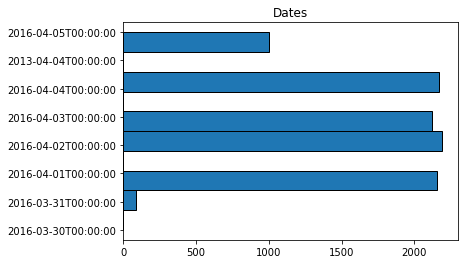

In [11]:
plt.title('Dates')
plt.hist(df['OffenseDate'],edgecolor='black',linewidth=1,orientation='horizontal')
#plt.xticks(rotation='vertical')
plt.show()

# Verificacion de agencyid

In [12]:
df['AgencyId'] = df['AgencyId'].replace('CA',1)
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [13]:
df.head()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,REP,Beale St/bryant St,San Francisco,CA,1,Intersection


In [17]:
df.shape

(9729, 10)

In [28]:
df.groupby('City').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,State,AgencyId,AddressType
City,,,,,,,,,
Brisbane,1,1,1,1,1,1,1,1,1
Daly City,5,5,5,5,5,5,5,5,5
Presidio,3,3,3,3,3,3,3,3,3
SAN FRANCISCO,1,1,1,1,1,1,1,1,1
San Francisco,9665,9665,9665,9665,9665,9665,9665,9665,9665
Treasure Isla,51,51,51,51,51,51,51,51,51
Yerba Buena,3,3,3,3,3,3,3,3,3


# Controlar Mayusculas y Minusculas

In [29]:
df['City'] = df['City'].replace('SAN FRANCISCO','San Francisco')
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [30]:
df.to_csv('prueba3.csv',sep=';')

In [34]:
df.groupby('Disposition').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Address,City,State,AgencyId,AddressType
Disposition,,,,,,,,,
22,77,77,77,77,77,77,77,77,77
ABA,97,97,97,97,97,97,97,97,97
ADM,46,46,46,46,46,46,46,46,46
ADV,1129,1129,1129,1129,1129,1129,1129,1129,1129
ARR,65,65,65,65,65,65,65,65,65
CAN,353,353,353,353,353,353,353,353,353
CIT,1406,1406,1406,1406,1406,1406,1406,1406,1406
CRT,2,2,2,2,2,2,2,2,2
GOA,1272,1272,1272,1272,1272,1272,1272,1272,1272


# 